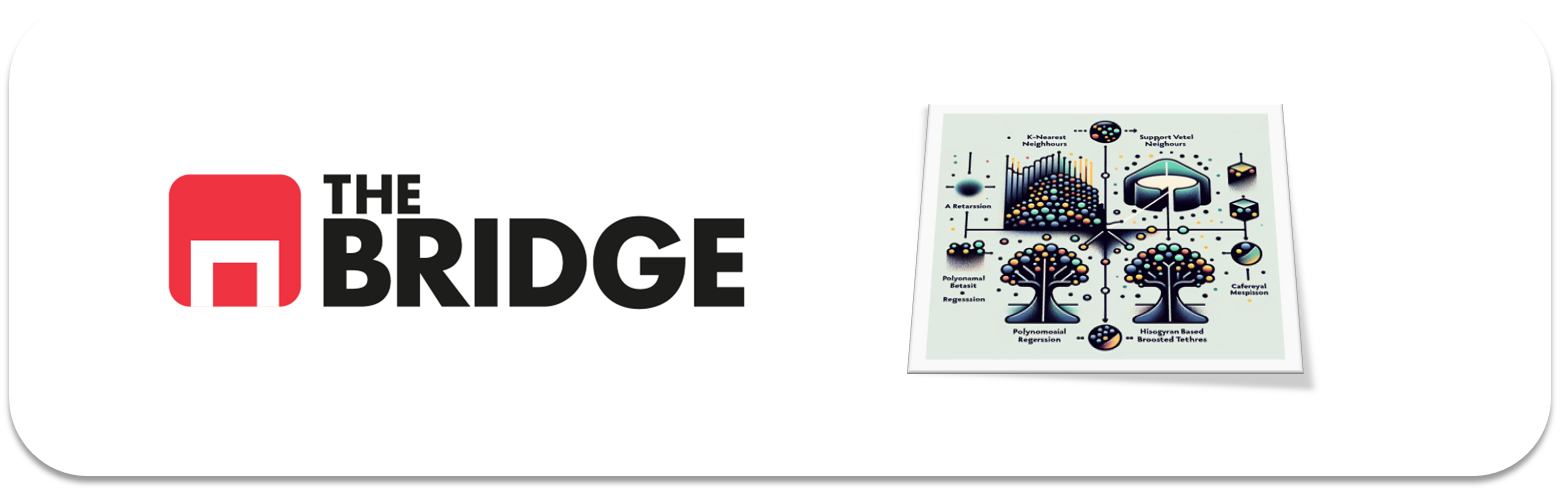

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, uniform

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df_wines=pd.read_csv("./data/wines_dataset.csv",sep="|")

In [3]:
df_wines.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.5             0.210         0.26            9.25      0.034   
1            8.3             0.160         0.37            7.90      0.025   
2            6.8             0.180         0.38            1.40      0.038   
3            6.1             0.260         0.25            2.90      0.047   
4            7.5             0.630         0.27            2.00      0.083   
5            5.7             0.265         0.28            6.90      0.036   
6            6.6             0.210         0.31           11.40      0.039   
7            6.7             0.310         0.30            2.10      0.038   
8            8.9             0.750         0.14            2.50      0.086   
9            7.5             0.420         0.20            1.40      0.060   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 73.0                 142.0  0.99450  3.05       0.37   
1                 38.0                 107.0  0.99306  2.93       0.37   
2                 35.0                 111.0  0.99180  3.32       0.59   
3                289.0                 440.0  0.99314  3.44       0.64   
4                 17.0                  91.0  0.99616  3.26       0.58   
5                 46.0                 150.0  0.99299  3.36       0.44   
6                 46.0                 165.0  0.99795  3.41       0.44   
7                 18.0                 130.0  0.99280  3.36       0.63   
8                  9.0                  30.0  0.99824  3.34       0.64   
9                 15.0                 168.0  0.99440  3.06       0.40   

   alcohol  quality  class  
0     11.4        6  white  
1     11.9        6  white  
2     11.2        7  white  
3     10.5        3  white  
4      9.8        6    red  
5     10.8        7  white  
6      9.8        7  white  
7     10.6        6  white  
8     10.5        5    red  
9      9.4        6  white

In [4]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df_wines["class"].unique()
df_wines["class_red"]=0
df_wines["class_white"]=0
df_wines.loc[df_wines['class'] =='red' , 'class_red'] = 1
df_wines.loc[df_wines['class'] =='white' , 'class_white'] = 1


In [7]:
df_wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality    class_red  \
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000   
mean      3.218501     0.531268    10.491801     5.818378     0.246114   
std       0.160787     0.148806     1.192712     0.873255     0.430779   
min       2.720000     0.220000     8.000000     3.000000     0.000000   
25%       3.110000     0.430000     9.500000     5.000000     0.000000   
50%       3.210000     0.510000    10.300000     6.000000     0.000000   
75%       3.320000     0.600000    11.300000     6.000000     0.000000   
max       4.010000     2.000000    14.900000     9.000000     1.000000   

       class_white  
count  6497.000000  
mean      0.753886  
std       0.430779  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [8]:
targets=["quality","alcohol"]
targets[0]
targets[1]

'alcohol'

In [9]:
train_set, test_set = train_test_split(df_wines, test_size= 0.2, random_state= 42)

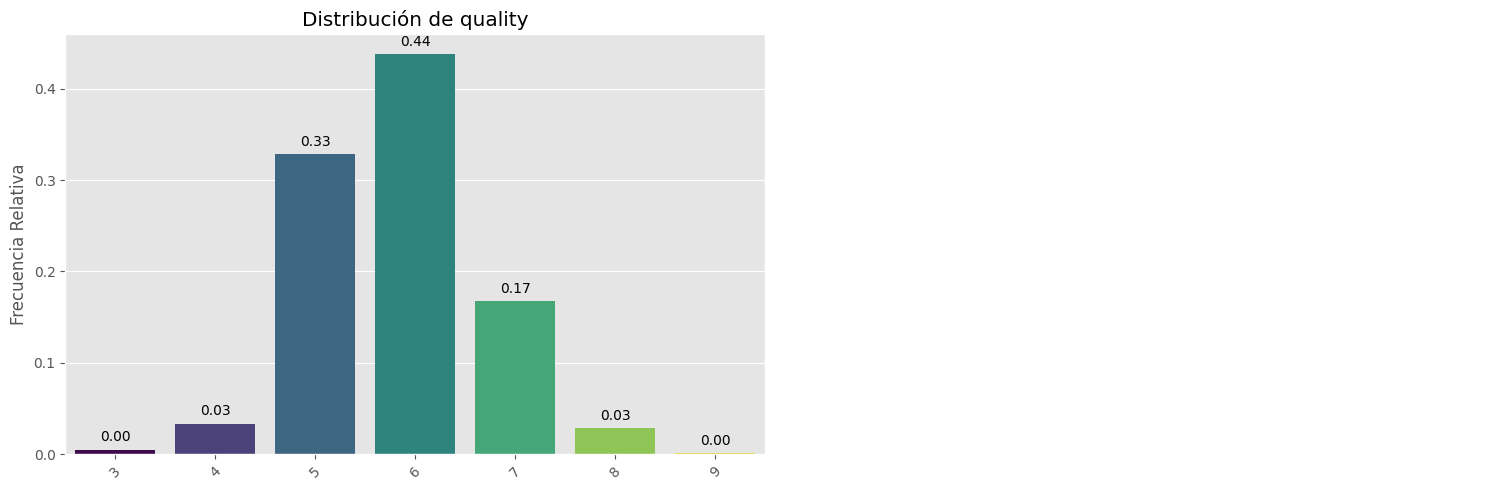

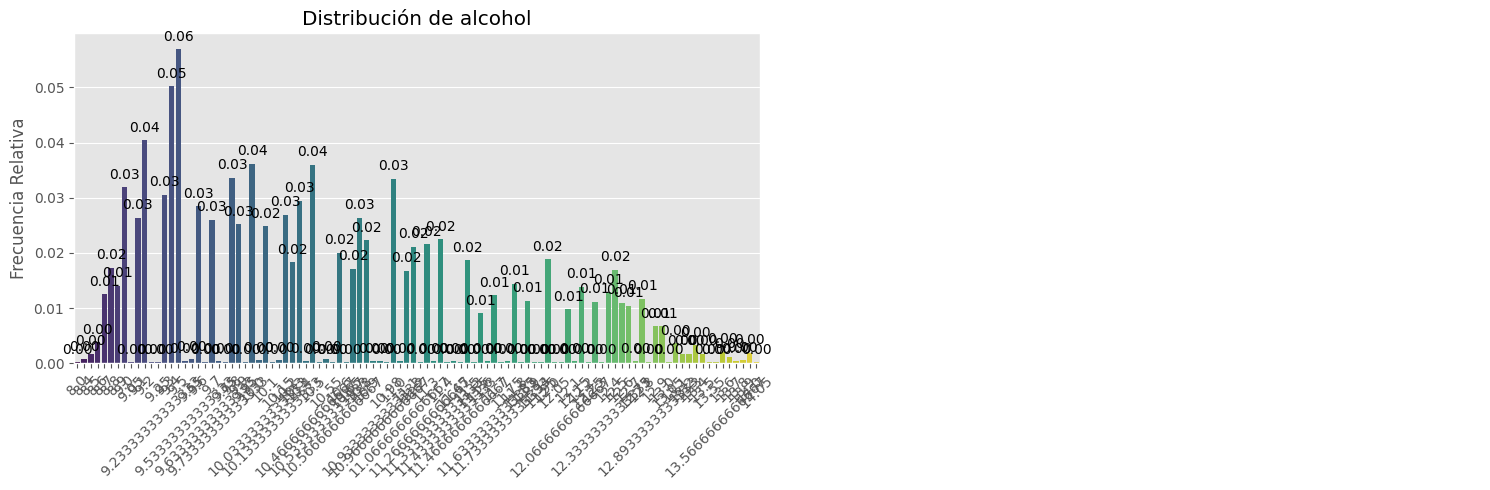

In [10]:
for variable in targets:
    bt.pinta_distribucion_categoricas(train_set, [variable], mostrar_valores= True, relativa= True)


In [11]:
features_num = train_set.columns.to_list()
for variable in targets:
    features_num.remove(variable)
print(len(features_num))

13


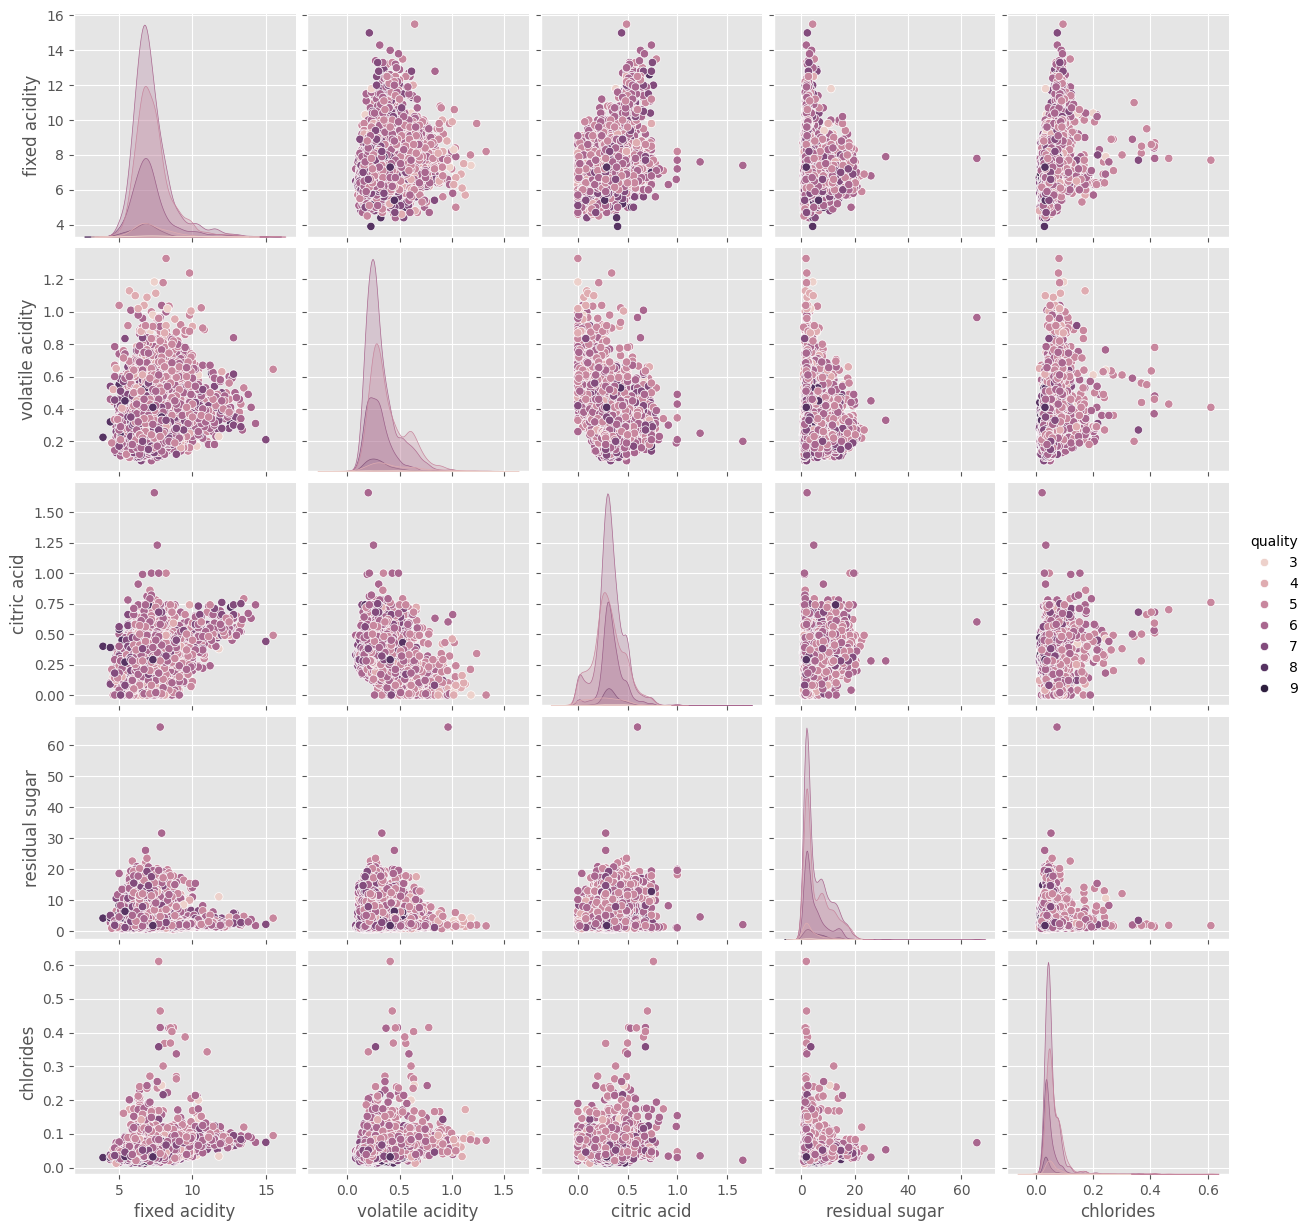

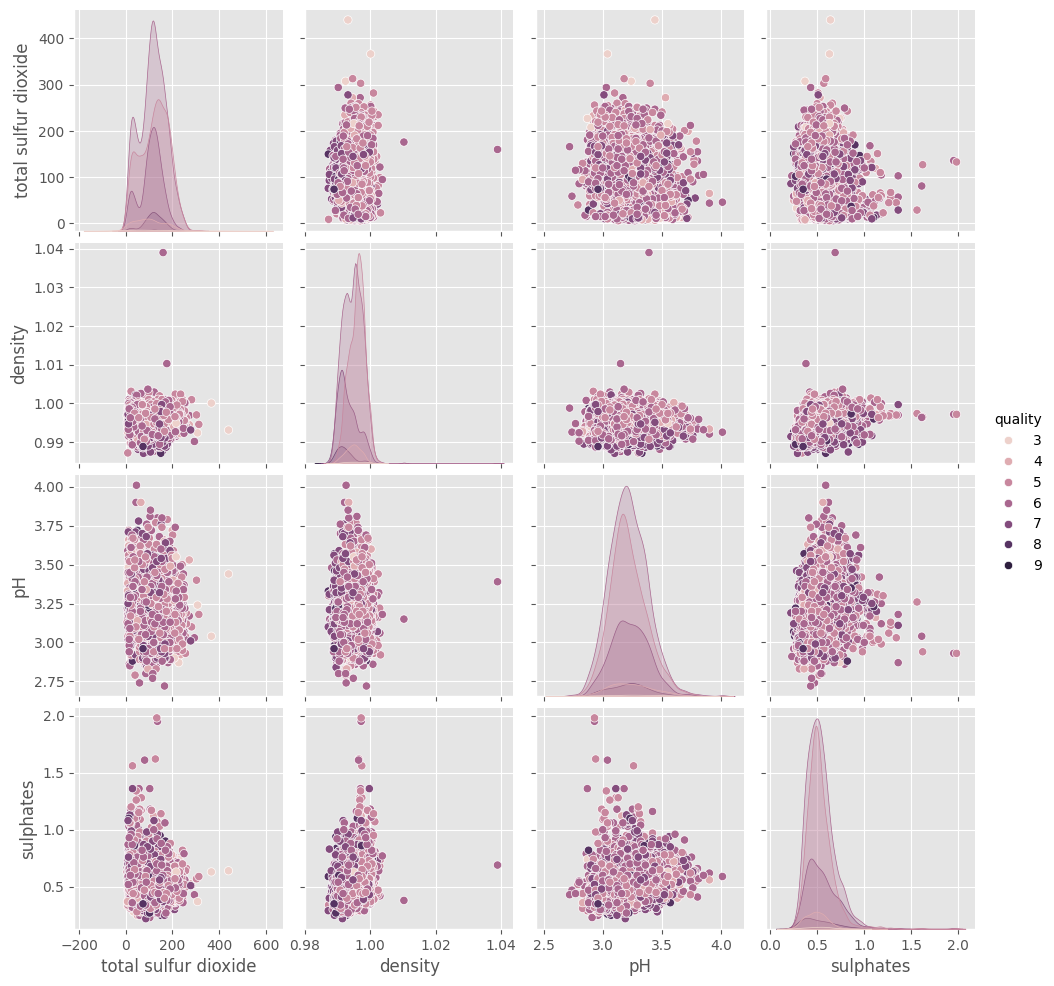

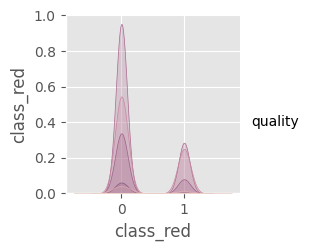

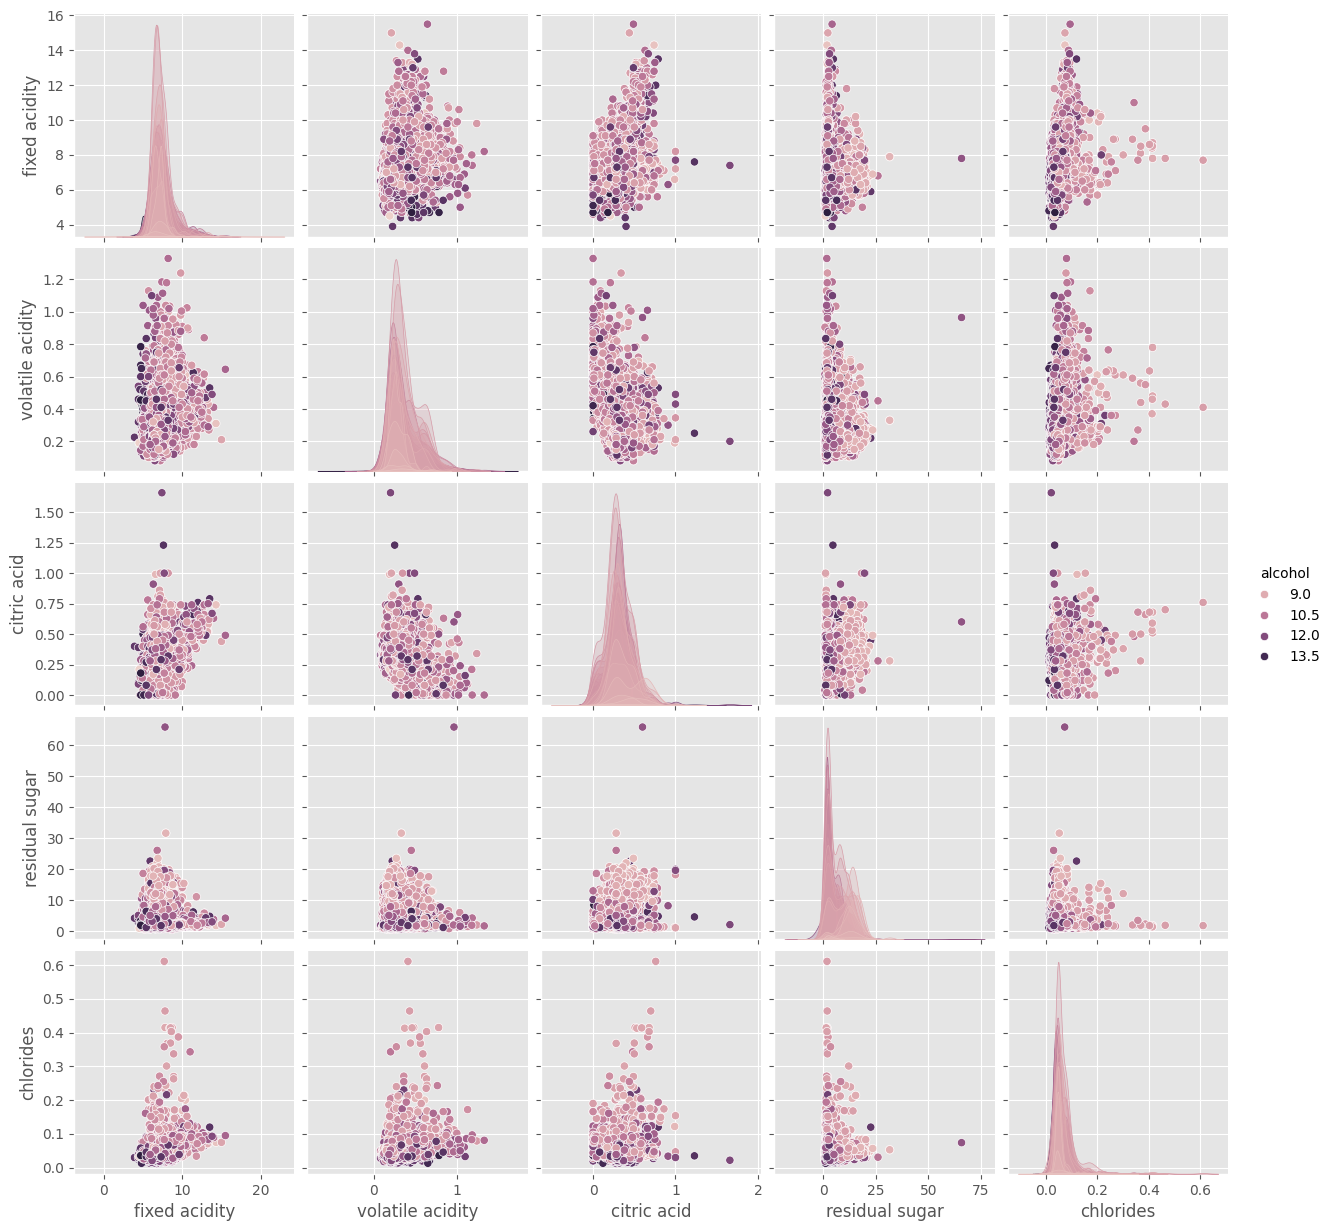

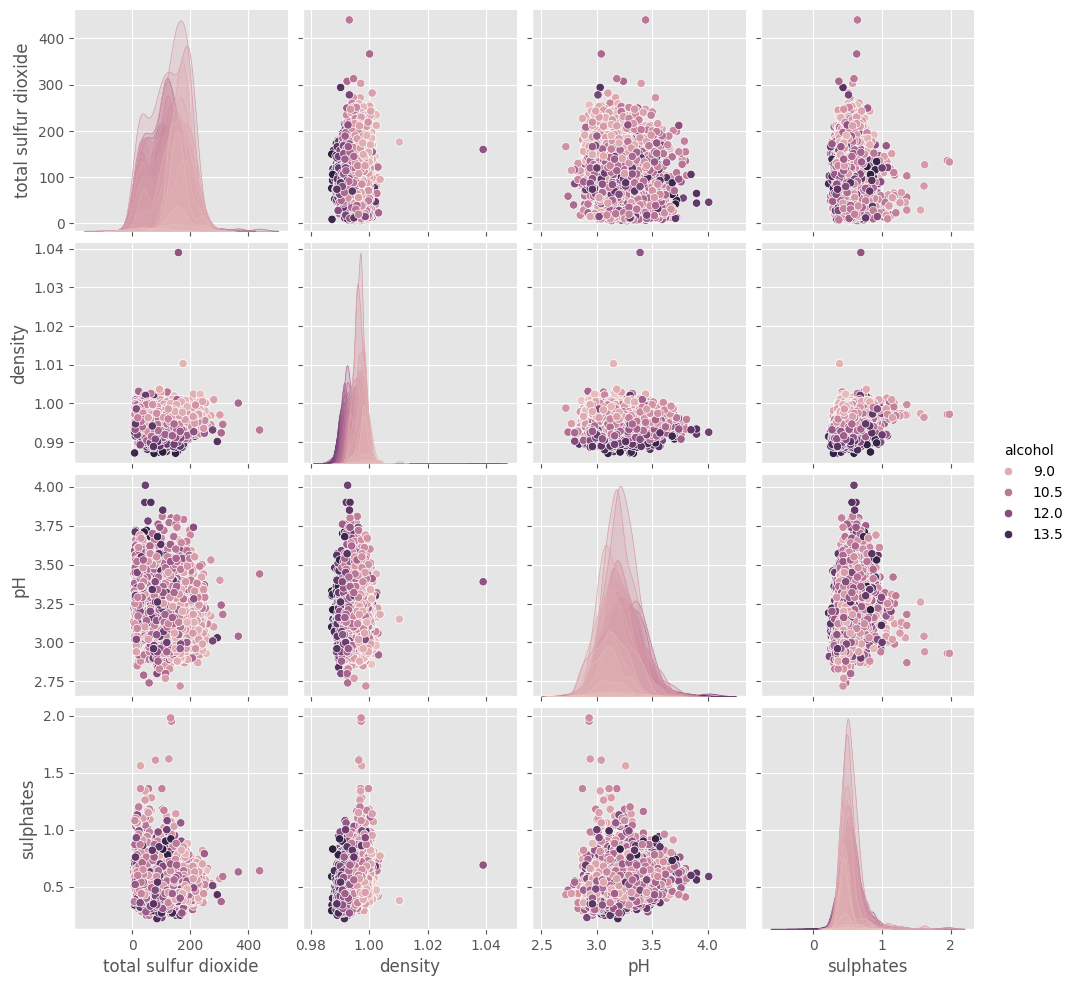

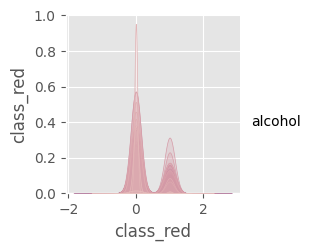

In [17]:
for variable in targets:
    sns.pairplot(train_set[features_num[0:5] + [variable]], hue = variable)
    sns.pairplot(train_set[features_num[6:10] + [variable]], hue = variable)
    sns.pairplot(train_set[features_num[11:12] + [variable]], hue = variable)

In [24]:
features_num_2 = ["chlorides","sulphates","class_red","class_white","fixed acidity","volatile acidity","citric acid","residual sugar","total sulfur dioxide","density"] 
df_wines[features_num_2].corr(numeric_only=True)


chlorides  sulphates  class_red  class_white  \
chlorides              1.000000   0.395593   0.512678    -0.512678   
sulphates              0.395593   1.000000   0.487218    -0.487218   
class_red              0.512678   0.487218   1.000000    -1.000000   
class_white           -0.512678  -0.487218  -1.000000     1.000000   
fixed acidity          0.298195   0.299568   0.486740    -0.486740   
volatile acidity       0.377124   0.225984   0.653036    -0.653036   
citric acid            0.038998   0.056197  -0.187397     0.187397   
residual sugar        -0.128940  -0.185927  -0.348821     0.348821   
total sulfur dioxide  -0.279630  -0.275727  -0.700357     0.700357   
density                0.362615   0.259478   0.390645    -0.390645   

                      fixed acidity  volatile acidity  citric acid  \
chlorides                  0.298195          0.377124     0.038998   
sulphates                  0.299568          0.225984     0.056197   
class_red                  0.486740          0.653036    -0.187397   
class_white               -0.486740         -0.653036     0.187397   
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   

                      residual sugar  total sulfur dioxide   density  
chlorides                  -0.128940             -0.279630  0.362615  
sulphates                  -0.185927             -0.275727  0.259478  
class_red                  -0.348821             -0.700357  0.390645  
class_white                 0.348821              0.700357 -0.390645  
fixed acidity              -0.111981             -0.329054  0.458910  
volatile acidity           -0.196011             -0.414476  0.271296  
citric acid                 0.142451              0.195242  0.096154  
residual sugar              1.000000              0.495482  0.552517  
total sulfur dioxide        0.495482              1.000000  0.032395  
density                     0.552517              0.032395  1.000000

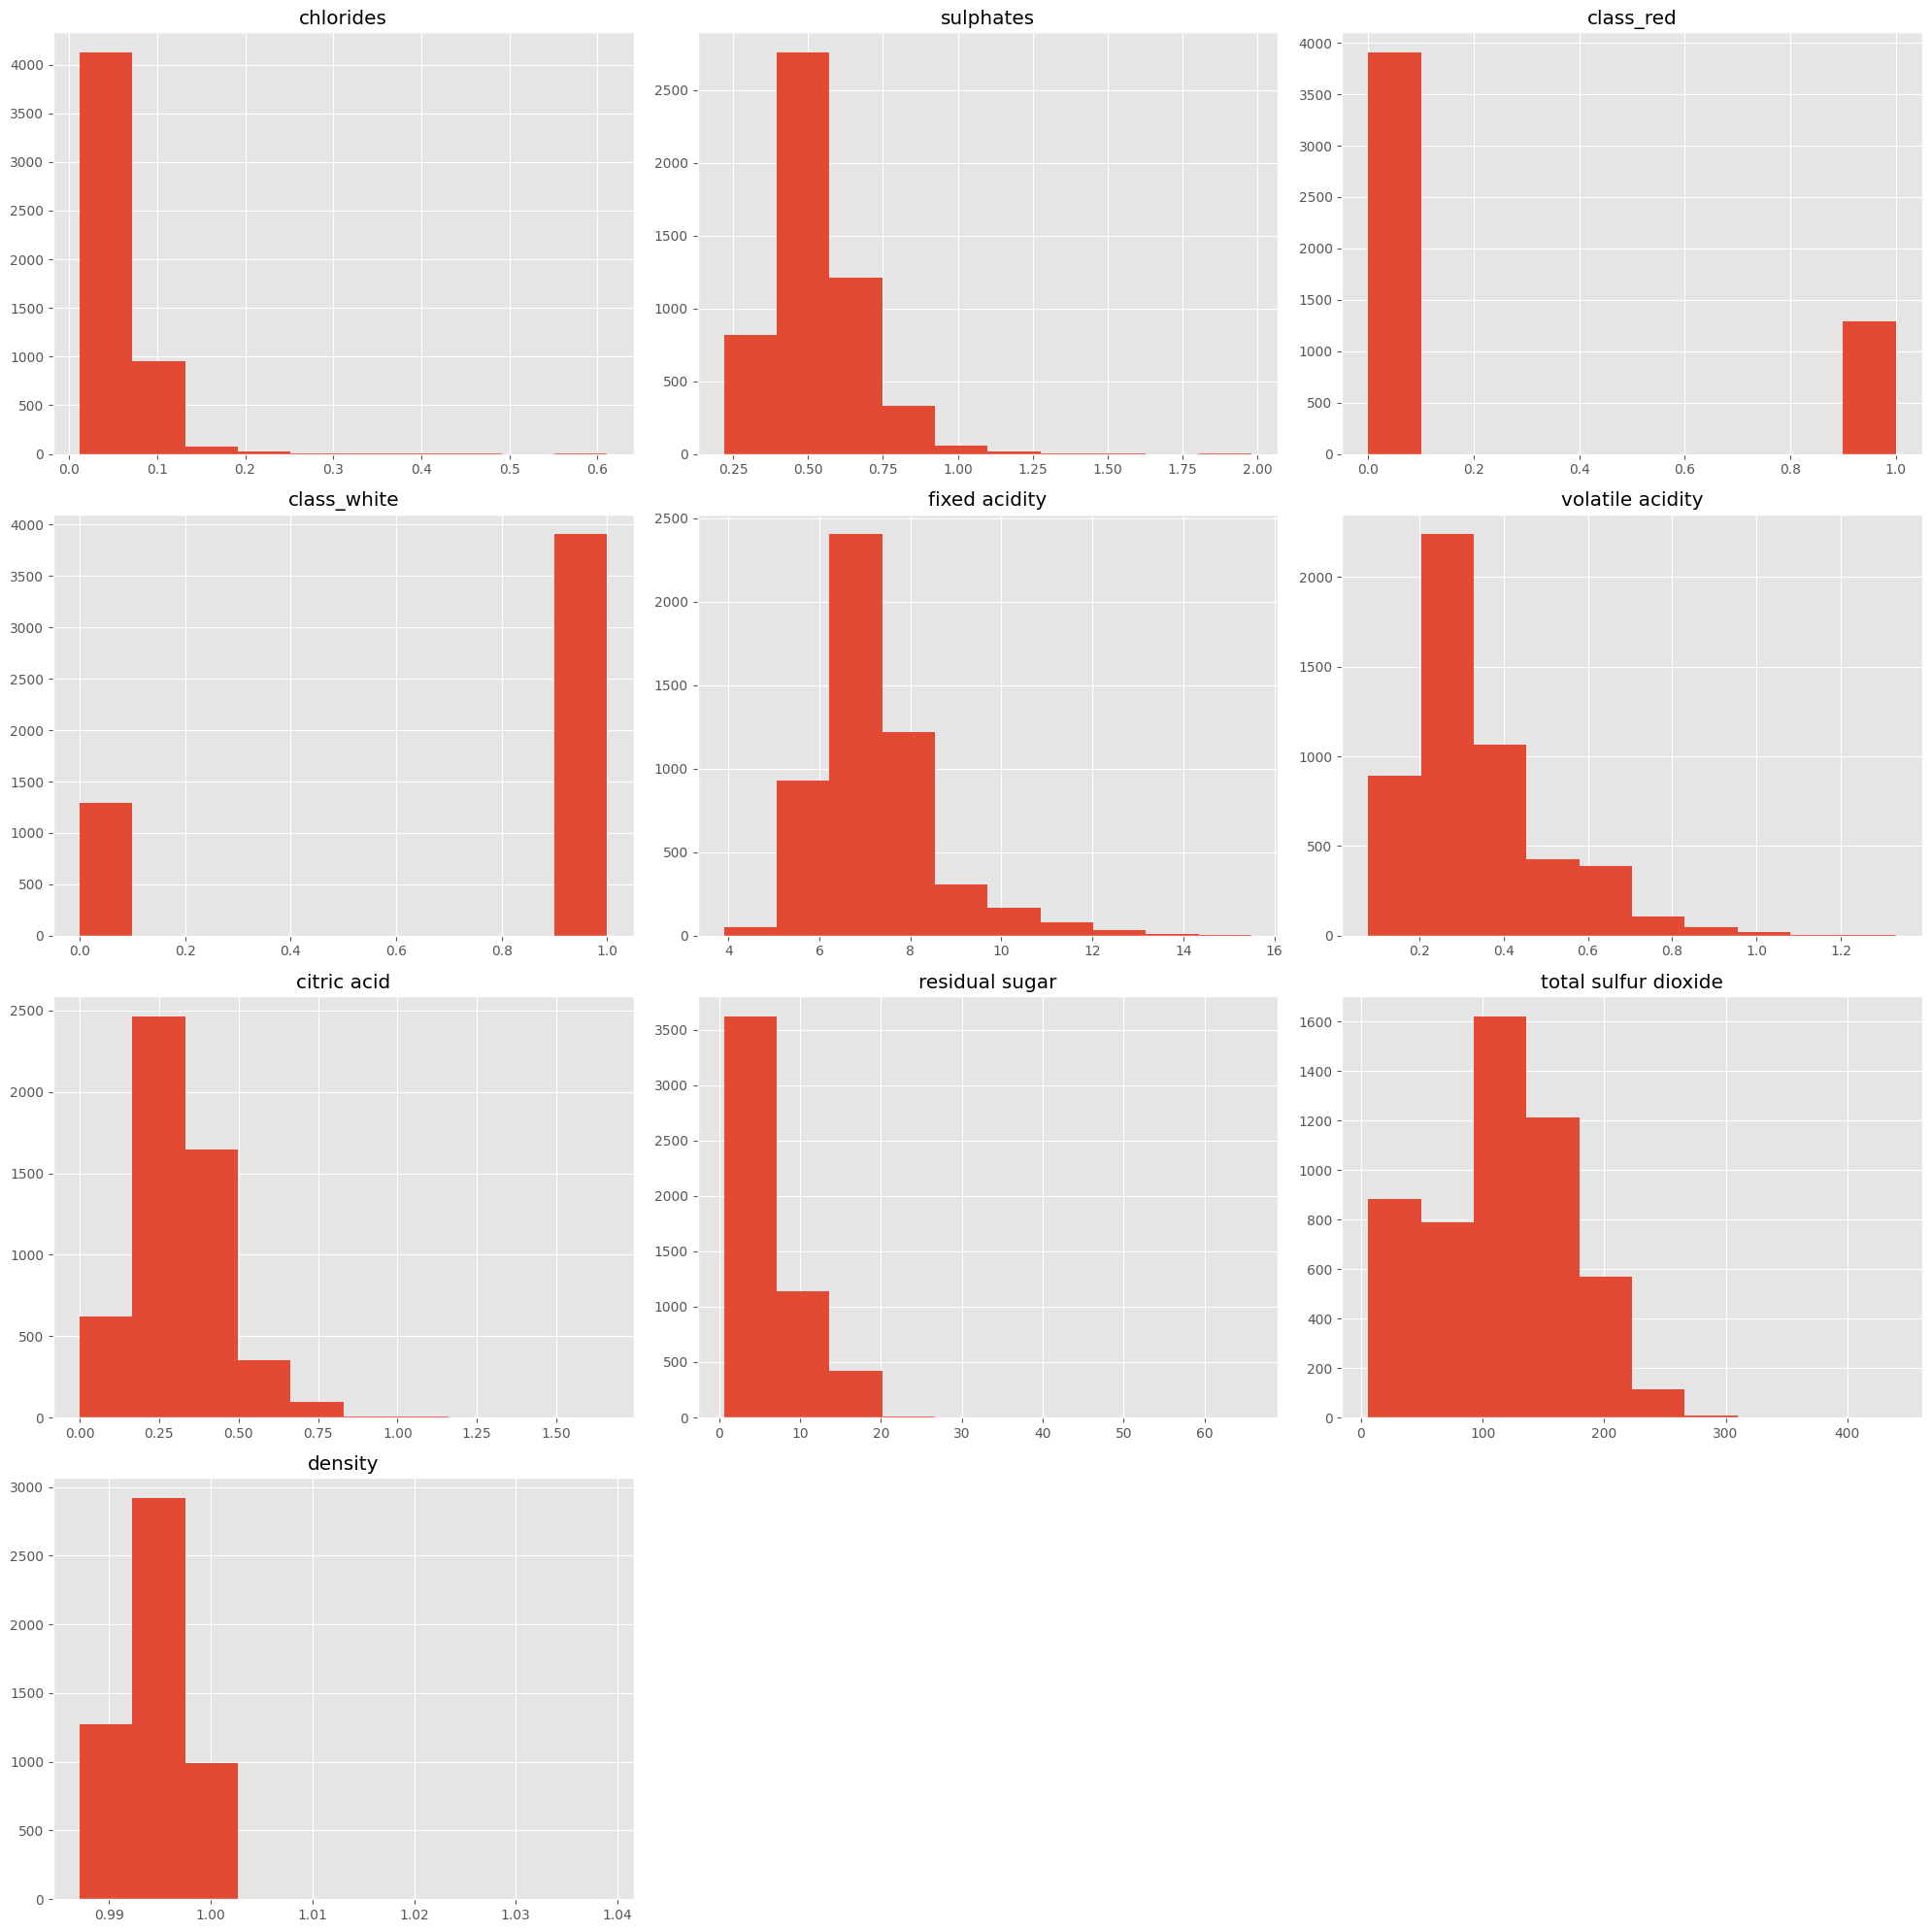

In [25]:
train_set[features_num_2].hist(figsize = (20,20))
plt.tight_layout()

In [26]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [27]:
for col in features_num_2:
    desplaza = 0 
    if train_set_scaled[col].min() <= 0:
        desplaza = int(abs(train_set_scaled[col].min())) + 1
    train_set_scaled[col] = np.log(train_set_scaled[col] + desplaza)
    test_set_scaled[col] = np.log(test_set_scaled[col] + desplaza)


In [28]:
scaler = StandardScaler()
train_set_scaled[features_num_2] = scaler.fit_transform(train_set_scaled[features_num_2])
test_set_scaled[features_num_2] = scaler.transform(test_set_scaled[features_num_2])
X_train = train_set_scaled[features_num_2]
y_train = train_set_scaled[targets]
X_test = test_set_scaled[features_num_2]
y_test = test_set_scaled[targets]

In [30]:
y_test

quality  alcohol
3103        5      9.3
1419        7     12.3
4761        8     12.5
4690        6     12.5
4032        7     12.2
...       ...      ...
889         5      9.2
2850        4      9.9
4917        7     12.1
5198        5     11.4
5643        5      9.4

[1300 rows x 2 columns]

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

**KNN**

In [31]:
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train[targets[0]])

KNeighborsClassifier()

In [32]:
print("Recall medio para knn:",np.mean(cross_val_score(knn, X_train, y_train[targets[0]], cv = 5, scoring = "balanced_accuracy")))


Recall medio para knn: 0.24916135172080614


In [33]:
print(classification_report(y_train[targets[0]], knn.predict(X_train)))

              precision    recall  f1-score   support

           3       0.50      0.08      0.14        24
           4       0.57      0.32      0.41       173
           5       0.69      0.76      0.72      1706
           6       0.69      0.76      0.72      2274
           7       0.69      0.55      0.61       869
           8       0.66      0.21      0.32       146
           9       0.00      0.00      0.00         5

    accuracy                           0.69      5197
   macro avg       0.54      0.38      0.42      5197
weighted avg       0.69      0.69      0.68      5197



c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [34]:
print(classification_report(y_test[targets[0]], knn.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.25      0.09      0.14        43
           5       0.58      0.64      0.61       432
           6       0.57      0.63      0.60       562
           7       0.46      0.38      0.41       210
           8       0.42      0.11      0.17        47

    accuracy                           0.55      1300
   macro avg       0.38      0.31      0.32      1300
weighted avg       0.54      0.55      0.54      1300



In [35]:
metricas = []
for k in range(1,21):
    print(f"Para k= {k}, recall medio:", end = " ")
    model = KNeighborsClassifier(n_neighbors= k)
    balanced_accuracy = np.mean(cross_val_score(model,X_train,y_train[targets[0]], cv = 5, scoring= "balanced_accuracy"))
    metricas.append(balanced_accuracy)
    print(balanced_accuracy)
best_k = np.argmax(metricas) + 1 # Guardo el hiperparámetro óptimo para luego entrenar el mejor modelo
print(f"best_k {best_k}")    

Para k= 1, recall medio: 0.3432804521121422
Para k= 2, recall medio: 0.2775171863622661
Para k= 3, recall medio: 0.27893634001667
Para k= 4, recall medio: 0.2552060098219239
Para k= 5, recall medio: 0.24916135172080614
Para k= 6, recall medio: 0.2414794009620688
Para k= 7, recall medio: 0.23980014221009607
Para k= 8, recall medio: 0.2364507962227882
Para k= 9, recall medio: 0.2333788180949096
Para k= 10, recall medio: 0.23171857924408
Para k= 11, recall medio: 0.22901784440362793
Para k= 12, recall medio: 0.22849453221587482
Para k= 13, recall medio: 0.22554471275811855
Para k= 14, recall medio: 0.22535915196654713
Para k= 15, recall medio: 0.22363233531713106
Para k= 16, recall medio: 0.22521627709496544
Para k= 17, recall medio: 0.2242673728555032
Para k= 18, recall medio: 0.2248939545978776
Para k= 19, recall medio: 0.2241738123444908
Para k= 20, recall medio: 0.22379779630260188
best_k 1


In [36]:
best_model = KNeighborsClassifier(n_neighbors= best_k)
best_model.fit(X_train, y_train[targets[0]])
print(classification_report(y_test[targets[0]], best_model.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.28      0.23      0.25        43
           5       0.68      0.65      0.66       432
           6       0.65      0.64      0.65       562
           7       0.51      0.58      0.54       210
           8       0.52      0.55      0.54        47

    accuracy                           0.61      1300
   macro avg       0.44      0.44      0.44      1300
weighted avg       0.62      0.61      0.61      1300



In [37]:
param_grid = {
    "n_neighbors": range(1,20),
    "weights": ["uniform","distance"]
}

knn_grid = GridSearchCV(knn, 
                        param_grid = param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy")

knn_grid.fit(X_train, y_train[targets[0]])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

In [38]:
knn_grid.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [39]:
knn_grid.best_score_

0.3432804521121422

In [40]:
print(classification_report(y_test[targets[0]], knn_grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.28      0.23      0.25        43
           5       0.68      0.65      0.66       432
           6       0.65      0.64      0.65       562
           7       0.51      0.58      0.54       210
           8       0.52      0.55      0.54        47

    accuracy                           0.61      1300
   macro avg       0.44      0.44      0.44      1300
weighted avg       0.62      0.61      0.61      1300



**RandomForestClassifier**

In [41]:
train_set, test_set = train_test_split(df_wines, test_size= 0.2, random_state= 42)
X_train = train_set[features_num_2]
y_train = train_set[targets]
X_test = test_set[features_num_2]
y_test = test_set[targets]

In [42]:
rf_clf = RandomForestClassifier(max_depth= 5, random_state= 42)
rf_clf.fit(X_train, y_train[targets[0]])

RandomForestClassifier(max_depth=5, random_state=42)

In [43]:
print(classification_report(y_train[targets[0]],rf_clf.predict(X_train)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        24
           4       1.00      0.01      0.01       173
           5       0.64      0.64      0.64      1706
           6       0.54      0.78      0.64      2274
           7       0.65      0.18      0.28       869
           8       0.00      0.00      0.00       146
           9       0.00      0.00      0.00         5

    accuracy                           0.58      5197
   macro avg       0.40      0.23      0.22      5197
weighted avg       0.59      0.58      0.54      5197



c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [44]:
recall_medio = np.mean(cross_val_score(rf_clf, X_train, y_train[targets[0]], cv = 5, scoring = "balanced_accuracy"))
print("Recall medio con validación cruzada", recall_medio)

Recall medio con validación cruzada 0.21043716111645955


In [45]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    random_state=42
)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X_train, y_train[targets[0]])

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_



c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'class_weight': 'balanced', 'bootstrap': True}


In [46]:
recall_medio = np.mean(cross_val_score(best_rf_model, X_train, y_train[targets[0]], cv = 5, scoring = "balanced_accuracy"))
print("Recall medio con validación cruzada", recall_medio)

Recall medio con validación cruzada 0.3383068857272468


**GradientBoostingClassifier**

In [47]:
# Create a Gradient Boosting Classifier
gbc_classifier = GradientBoostingClassifier(random_state=42)
gbc_classifier.fit(X_train, y_train[targets[0]])


GradientBoostingClassifier(random_state=42)

In [48]:
recall_medio = np.mean(cross_val_score(gbc_classifier, X_train, y_train[targets[0]], cv = 5, scoring = "balanced_accuracy"))
print("Recall medio con validación cruzada", recall_medio)

Recall medio con validación cruzada 0.25647027898191127


In [49]:

# Assume X_train, y_train are your training data
# Define the parameter grid
param_grid = {
    'n_estimators': randint(50, 200),  # Random integer values between 50 and 200
    'learning_rate': uniform(0.01, 0.1),  # Random float values between 0.01 and 0.1
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'warm_start': [True, False]
}

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    gb_classifier,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    random_state=42
)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X_train, y_train[targets[0]])

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_gb_model = random_search.best_estimator_

c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

Best Hyperparameters: {'learning_rate': 0.06677003278199915, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 93, 'subsample': 0.9, 'warm_start': False}


In [50]:
recall_medio = np.mean(cross_val_score(best_gb_model, X_train, y_train[targets[0]], cv = 5, scoring = "balanced_accuracy"))
print("Recall medio con validación cruzada", recall_medio)

Recall medio con validación cruzada 0.3343642230579718


El que mejor recall medio tiene es KNN

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [67]:
train_set, test_set = train_test_split(df_wines, test_size= 0.2, random_state= 42)
target="alcohol"
scaler = StandardScaler()
train_set_scaled[features_num_2] = scaler.fit_transform(train_set_scaled[features_num_2])
test_set_scaled[features_num_2] = scaler.transform(test_set_scaled[features_num_2])
X_train = train_set_scaled[features_num_2]
y_train = train_set_scaled[target]
X_test = test_set_scaled[features_num_2]
y_test = test_set_scaled[target]

In [107]:
new_columns={}
for valor in features_num_2:
        new_columns[valor]=valor.replace(" ","_")
X_train.rename(columns=new_columns,inplace=True)
X_test.rename(columns=new_columns,inplace=True)

C:\Users\Jorge\AppData\Local\Temp\ipykernel_16004\3316852880.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.rename(columns=new_columns,inplace=True)
C:\Users\Jorge\AppData\Local\Temp\ipykernel_16004\3316852880.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.rename(columns=new_columns,inplace=True)


In [68]:
X_train

chlorides  sulphates  class_red  class_white  fixed acidity  \
1916  -0.060514   2.317739   1.740311    -1.740311       0.638911   
947   -0.314118   1.039085  -0.574610     0.574610      -0.009886   
877   -0.538691  -2.226295  -0.574610     0.574610       0.403655   
2927   0.124383  -0.102163  -0.574610     0.574610      -1.032809   
6063   1.689954   0.476592   1.740311    -1.740311       1.431080   
...         ...        ...        ...          ...            ...   
3772  -0.158705   0.408774  -0.574610     0.574610      -0.640627   
5191   0.336801  -0.513010  -0.574610     0.574610      -0.453637   
5226   0.079501   0.339756  -0.574610     0.574610      -0.453637   
5390  -1.064470  -1.492996  -0.574610     0.574610       0.158922   
860   -0.598346  -0.600642  -0.574610     0.574610      -1.134940   

      volatile acidity  citric acid  residual sugar  total sulfur dioxide  \
1916         -1.231017     0.592888       -0.626806             -0.494651   
947          -1.231017     2.560877        1.640058              0.848922   
877           1.161539    -0.505652       -1.328264              0.117041   
2927         -0.476337    -0.218268        0.822971              0.448709   
6063          0.485576     0.657314       -0.526110             -3.140792   
...                ...          ...             ...                   ...   
3772         -0.570119     1.217401        1.297200              1.101242   
5191         -0.770012    -0.218268        1.341245              0.372907   
5226         -0.988970     0.462643        0.852646              0.579384   
5390          0.660140    -0.147825       -0.859034             -0.356408   
860          -1.231017    -0.218268        0.346202              0.520593   

       density  
1916  0.428507  
947   1.621058  
877  -0.901615  
2927  0.059935  
6063  0.441782  
...        ...  
3772  0.627565  
5191  1.276985  
5226 -0.003196  
5390 -1.939496  
860  -1.018256  

[5197 rows x 10 columns]

In [69]:
#y_train=pd.DataFrame(y_train,columns=[target])
y_train

1916    11.3
947      9.0
877     10.8
2927     9.4
6063    11.9
        ... 
3772     9.3
5191     9.4
5226    11.0
5390    13.0
860     11.3
Name: alcohol, Length: 5197, dtype: float64

In [83]:
def metricas(test,pred):
    
    print("Error medio absoluto:",mean_absolute_error(test,pred))
    print("Error medio absoluto porcentual:",mean_absolute_percentage_error(test,pred))
    print("Raiz cuadrada del error cuadrático:",np.sqrt(mean_squared_error(test,pred)))
    print("R2 score:",r2_score(test,pred))
    return None


In [88]:

rfr_lr = RandomForestRegressor(max_depth=4,random_state=42)

rfr_lr.fit(X_train, y_train)

y_pred_rfr = rfr_lr.predict(X_test)

In [89]:
metricas(y_test,y_pred_rfr)

Error medio absoluto: 0.5233955899152564
Error medio absoluto porcentual: 0.04995531145265794
Raiz cuadrada del error cuadrático: 0.6725842391681105
R2 score: 0.6790097757968503


In [97]:
# Define a balanced param_grid
param_grid = {
    'n_estimators': randint(50, 200),            # Random integer values between 50 and 200
    'max_features': ['auto', 'sqrt', 'log2'],    # Options for the maximum number of features to consider for splitting
    'max_depth': [None] + list(range(5, 21)),    # Values for the maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Values for the minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Values for the minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                   # Whether bootstrap samples are used when building trees
}

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_regressor,
    param_distributions=param_grid,
    n_iter=10,          # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5,               # Number of cross-validation folds
    random_state=42
)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X_train, y_train)

c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py",

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000154F49B5D80>},
                   random_state=42, scoring='neg_mean_squared_error')

In [98]:
metricas(y_test,random_search.predict(X_test))

Error medio absoluto: 0.3095665525384323
Error medio absoluto porcentual: 0.029304845439904848
Raiz cuadrada del error cuadrático: 0.4504983719746901
R2 score: 0.8559925747839029


In [79]:
xgb_model = XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb_model = xgb_model.predict(X_test)


In [82]:
metricas(y_test,y_pred_xgb_model)

Error medio absoluto: 0.3031098210750482
Error medio absoluto porcentual: 0.028774433144444885
Raiz cuadrada del error cuadrático: 0.44008242954361637
R2 score: 0.8625747635558701


In [99]:
# Define a balanced param_grid
param_grid = {
    'n_estimators': randint(50, 200),            # Random integer values between 50 and 200
    'learning_rate': uniform(0.01, 0.1),         # Random float values between 0.01 and 0.1
    'max_depth': [3, 4, 5, 6, None],             # Values for the maximum depth of the tree
    'subsample': [0.8, 0.9, 1.0],                # Values for the subsample ratio of the training instance
    'colsample_bytree': [0.8, 0.9, 1.0],         # Values for the subsample ratio of columns when constructing each tree
    'gamma': [0, 1, 2],                          # Values for the minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.1, 0.5, 1],               # Values for L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1],              # Values for L2 regularization term on weights
}

# Create an XGBRegressor
xgb_regressor = XGBRegressor(random_state=42)

# Create a RandomizedSearchCV object
xgb_regressor_random_search = RandomizedSearchCV(
    xgb_regressor,
    param_distributions=param_grid,
    n_iter=10,          # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5,               # Number of cross-validation folds
    random_state=42
)

# Fit the RandomizedSearchCV object to your data
xgb_regressor_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000154F49624A0>,
                                        'max_depth': [3, 4, 5, 6, None],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000154F4AC1BD0>,
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [0, 0.1, 0.5, 1],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [100]:
metricas(y_test,xgb_regressor_random_search.predict(X_test))

Error medio absoluto: 0.32082902737152885
Error medio absoluto porcentual: 0.03063801881816723
Raiz cuadrada del error cuadrático: 0.4375563556303795
R2 score: 0.8641478779152112


In [108]:
lgbm_model = LGBMRegressor(random_state=42)

lgbm_model.fit(X_train, y_train)

y_pred_lgbm_model = lgbm_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 10
[LightGBM] [Info] Start training from score 10.490439


In [109]:
metricas(y_test,y_pred_lgbm_model)

Error medio absoluto: 0.3208691633830876
Error medio absoluto porcentual: 0.030575901690141974
Raiz cuadrada del error cuadrático: 0.43852658403324063
R2 score: 0.8635447385963771


In [110]:
# Define a balanced param_grid
param_grid = {
    'n_estimators': randint(50, 200),            # Random integer values between 50 and 200
    'learning_rate': uniform(0.01, 0.1),         # Random float values between 0.01 and 0.1
    'max_depth': [3, 4, 5, 6, -1],               # Values for the maximum depth of the tree (-1 means unlimited)
    'subsample': [0.8, 0.9, 1.0],                # Values for the subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],         # Values for the subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5, 1],               # Values for L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1],              # Values for L2 regularization term on weights
    'min_child_samples': randint(5, 20),         # Random integer values between 5 and 20
}

# Create an LGBMRegressor
lgbm_regressor = LGBMRegressor(random_state=42)

# Create a RandomizedSearchCV object
lgbm_regressor_random_search = RandomizedSearchCV(
    lgbm_regressor,
    param_distributions=param_grid,
    n_iter=10,          # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5,               # Number of cross-validation folds
    random_state=42
)

# Fit the RandomizedSearchCV object to your data
lgbm_regressor_random_search.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1248
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 10
[LightGBM] [Info] Start training from score 10.500495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000154F4B20C10>,
                                        'max_depth': [3, 4, 5, 6, -1],
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000154F4B21C30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000154F4B21990>,
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [0, 0.1, 0.5, 1],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [111]:
metricas(y_test,lgbm_regressor_random_search.predict(X_test))

Error medio absoluto: 0.34098184992670977
Error medio absoluto porcentual: 0.03253796945961344
Raiz cuadrada del error cuadrático: 0.45506144795648484
R2 score: 0.8530605119114252


In [112]:
rf_cv_scores_1 = cross_val_score(rfr_lr, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
xgb_cv_scores_1 = cross_val_score(xgb_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
lgbm_cv_scores_1 = cross_val_score(lgbm_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
rf_cv_scores_2 = cross_val_score(random_search, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
xgb_cv_scores_2 = cross_val_score(xgb_regressor_random_search, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
lgbm_cv_scores_2 = cross_val_score(lgbm_regressor_random_search, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 1040, number of used features: 10
[LightGBM] [Info] Start training from score 10.484792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 1040, number of used features: 10
[LightGBM] [Info] Start training from score 10.464769
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 1040, number of used features: 10
[LightGBM] [Info] Start trainin

c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py",

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 832, number of used features: 10
[LightGBM] [Info] Start training from score 10.440537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [105]:
print(rf_cv_scores_1,rf_cv_scores_2)
print(xgb_cv_scores_1,xgb_cv_scores_2)
print(lgbm_cv_scores_1,lgbm_cv_scores_2)

[-0.42248923 -0.41715744 -0.394135   -0.41347829 -0.47565168] [-0.29487372 -0.28359243 -0.28022108 -0.31880726 -0.38335031]
[-0.29314001 -0.30459242 -0.26108101 -0.27782928 -0.32925214] [-0.26256474 -0.27250978 -0.24077995 -0.25519401 -0.30444619]
[-0.274139   -0.25682684 -0.26041977 -0.25929488 -0.30108541] [-0.27672282 -0.26585283 -0.26062267 -0.273207   -0.31579868]
